Given a path to a directory, write a function prints the names of all the files in that directory. If sort is True, then the contents are printed in lexigraphical order.

Given a path to a file,write a function that prints the first n lines in the file.

Given a path to a file,write a function that prints the last n lines in the file.

Given a url (i.e. a uniform resource locator) to a zipfile, this function retrieves the file via a HTTP request and then extracts all the contents of the file to the specified destdir.


In [1]:
# Imports

import os
import requests
import zipfile
import StringIO
import re

# Constants

NATIONAL_DATA_URL = 'https://www.ssa.gov/oact/babynames/names.zip'
NATIONAL_DATA_DIR = 'national_baby_names'

STATE_DATA_URL    = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
STATE_DATA_DIR    = 'state_baby_names'

# Functions
def sort_nicely( l ):
    ''' Sort the given list in the way that humans expect.'''
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    l.sort( key=alphanum_key )
    return l

def ls(path=os.curdir, sort=True):
    ''' Lists the contents of directory specified by path '''
    dirs = os.listdir(path)
    if sort==True:
#        dirs.sort()
        new_dir = sort_nicely(dirs)
    for file in new_dir:
        print file

def head(path, n=10):
    ''' Lists the first n lines of file specified by path '''
    try:
        filehandle = open(path)
    except:
        print 'File cannot be opened:',path
        exit()
    count = 0
    for line in filehandle:
        print line.rstrip()
        count += 1
        if count==n:
            break     

def tail(path, n=10):
    ''' Lists the last n lines of file specified by path '''
    try:
        filehandle = open(path)
    except:
        print 'File cannot be opened:',path
        exit()
    count = 0
    for line in reversed(filehandle.readlines()):
        print line.rstrip()
        count += 1
        if count==n:
            break
    

def download_and_extract_zipfile(url, destdir):
    ''' Downloads zip file from url and extracts the contents to destdir '''
    r = requests.get(url)
    # Convert string to file object
    filehandle =  StringIO.StringIO(r.content)
    # Open file object as zip file
    z = zipfile.ZipFile(filehandle)   
    # Extract all zip data to destdir
    z.extractall(destdir)
    
download_and_extract_zipfile(NATIONAL_DATA_URL,NATIONAL_DATA_DIR)
ls()
print
head('state_baby_names/IN.TXT')
print
tail('state_baby_names/IN.TXT')

.git
.ipynb_checkpoints
Babynames.ipynb
Google_geo.ipynb
README.md
SimpleStats.ipynb
mortgage.py
national_baby_names
num.py
palindrome.py
reddit.ipynb
state_baby_names
str.py

IN,F,1910,Mary,619
IN,F,1910,Helen,324
IN,F,1910,Ruth,238
IN,F,1910,Dorothy,215
IN,F,1910,Mildred,200
IN,F,1910,Margaret,196
IN,F,1910,Thelma,137
IN,F,1910,Edna,113
IN,F,1910,Martha,112
IN,F,1910,Hazel,108

IN,M,2014,Zakary,5
IN,M,2014,Zain,5
IN,M,2014,Yael,5
IN,M,2014,Xavi,5
IN,M,2014,Waylen,5
IN,M,2014,Viktor,5
IN,M,2014,Vernon,5
IN,M,2014,Tyrone,5
IN,M,2014,Tyreese,5
IN,M,2014,Tryston,5


Process all of the files in the national dataset and generate two plots of your name from 1880 to 2014:

The first graph you should produce is a plot of the raw number of occurrences for each year.

The second graph you should produce is a plot of the percentage of occurrences for each year (how many times your name appeared relative to the total number of names).


In [2]:
#Count the occurrences in a year file
def count_occurrences_in_year(path, baby_name):
    ''' Return the number of occurrences for the baby_name and 
    the total number of babies for the year file specified by path '''
    try:
        year_file = open(path)
    except:
        print 'File cannot be opened:',path
        exit()
        
    count=0
    name_count=0
    for line in year_file:
        lst = line.split(',')
        count = count + int(lst[2])
#       if line.find(baby_name)!=-1:
        if re.search(r'\b' + baby_name + r'\b',lst[0]):
            name_count = name_count + int(lst[2])
        count += 1
    
    year_file.close()
    return(name_count,count)
    
(name_count,count) = count_occurrences_in_year(os.path.join(NATIONAL_DATA_DIR, 'yob1880.txt'), 'Peter')
print name_count,count

496 203484


In [3]:
#Count the occurrences in a range of years
def count_occurrences_in_years(path, baby_name, years):
    ''' Return a list of occurrences for the range of years in the data directory specified by path '''
    data = []
    for year in years:
        filename = 'yob' + str(year) + '.txt'
        data.append(count_occurrences_in_year(os.path.join(path,filename), baby_name))
    return data
    
data = count_occurrences_in_years(NATIONAL_DATA_DIR, 'Peter',range(1880, 2015))
for x in data:
    print x[0],x[1]

496 203484
428 194634
461 223665
450 219034
524 245764
516 243149
437 257711
427 249769
498 302131
425 291540
410 304097
396 289338
465 337304
392 328054
391 341635
412 354077
402 360581
397 349988
409 384727
360 342277
443 454058
343 348972
433 390098
372 384596
395 407057
409 427604
433 432095
473 469347
542 492675
539 515454
631 595348
850 649134
1684 994399
1943 1144042
2636 1424273
3322 1841835
3383 1944118
3477 2016706
3723 2181584
3392 2120664
3513 2273502
3563 2345312
3572 2299963
3427 2313141
3537 2392494
3385 2343952
3377 2306270
3329 2329454
3329 2270795
3242 2201550
3283 2232726
3134 2112914
3152 2120184
3150 2007848
3313 2085510
3432 2098390
3728 2086071
3823 2139126
4311 2221147
4654 2211981
5070 2311186
5627 2444944
6605 2740743
6893 2831334
6362 2698813
6508 2661663
7499 3204537
8610 3612239
8071 3462518
8278 3494812
8373 3514160
9026 3691582
9591 3809630
9752 3860935
10092 3990017
11028 4023694
11339 4132549
11613 4211588
10764 4143116
11313 4168320
10755 4166735
10379

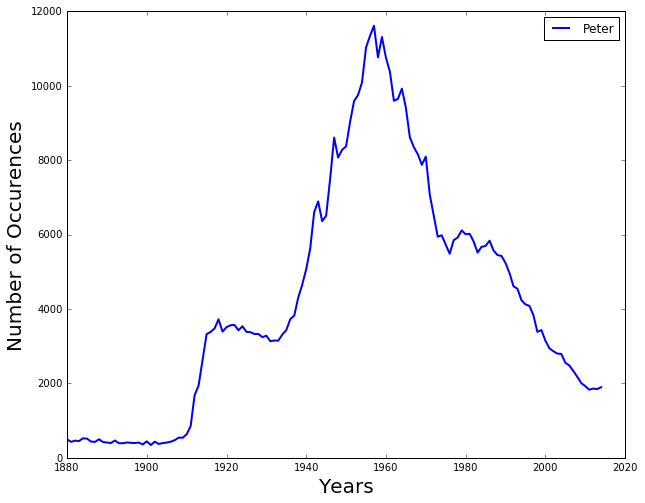

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the national occurrences
def plot_national_occurrences(data, years,name):
    ''' Plot the number of occurrences in the given range of years '''
    occurrences = []
    for x in data:
        occurrences.append(x[0])
    
    plt.figure(figsize=(10, 8))
    plt.plot(years,occurrences,linewidth=2,label = name)
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Number of Occurences',fontsize=20)
    plt.legend(loc='upper right')
    plt.show()
         
years = range(1880, 2015)
data  = count_occurrences_in_years(NATIONAL_DATA_DIR,'Peter',years)
plot_national_occurrences(data, years,'Peter')    

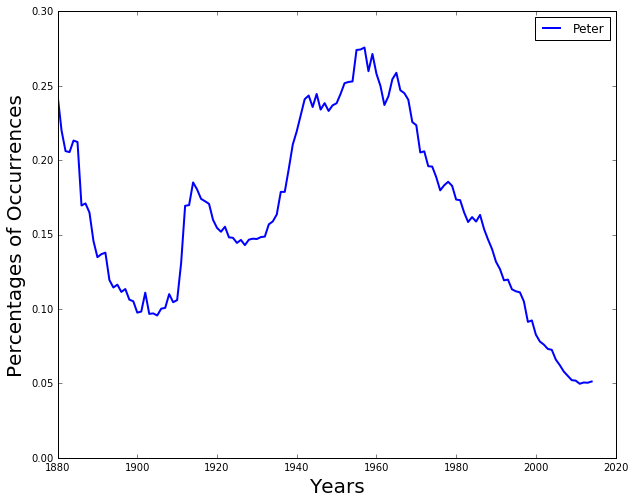

In [5]:
# Plot the national percentages
def plot_national_percentages(data, years,name):
    ''' Plot the percentages of occurrences in the given range of years '''
    percent_occur = []
    for x in data:
         percent_occur.append(x[0]*100.0/x[1])
    
    plt.figure(figsize=(10, 8))
    plt.plot(years,percent_occur,linewidth=2,label=name)
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Percentages of Occurrences',fontsize=20)
    plt.legend(loc='upper right')
    plt.show()
    
years = range(1880, 2015)
data  = count_occurrences_in_years(NATIONAL_DATA_DIR,'Peter',years)
plot_national_percentages(data, years,'Peter')    

In [6]:
# Count the yearly occurrences in a state file
def count_yearly_occurrences_in_state(path, baby_name):
    ''' Return a dict with the number of occurrences for the baby_name in each year '''
    try:
        state_file = open(path)
    except:
        print 'File cannot be opened:',path
        exit()
    
    dict_state = {}
    name_count=0
    for line in state_file:
        lst = line.split(',')   
        if re.search(r'\b' + baby_name + r'\b',lst[3]):
            dict_state[int(lst[2])] = int(lst[4])
    
    state_file.close()
    return(dict_state)

dict_state = count_yearly_occurrences_in_state('state_baby_names/CA.TXT', 'Peter')
print dict_state

{1910: 12, 1911: 18, 1912: 47, 1913: 47, 1914: 54, 1915: 106, 1916: 88, 1917: 99, 1918: 98, 1919: 92, 1920: 117, 1921: 128, 1922: 122, 1923: 143, 1924: 146, 1925: 152, 1926: 195, 1927: 162, 1928: 137, 1929: 150, 1930: 179, 1931: 182, 1932: 152, 1933: 173, 1934: 199, 1935: 180, 1936: 209, 1937: 217, 1938: 230, 1939: 263, 1940: 285, 1941: 321, 1942: 390, 1943: 427, 1944: 390, 1945: 467, 1946: 492, 1947: 576, 1948: 567, 1949: 579, 1950: 591, 1951: 698, 1952: 746, 1953: 772, 1954: 764, 1955: 812, 1956: 954, 1957: 934, 1958: 854, 1959: 972, 1960: 906, 1961: 922, 1962: 880, 1963: 896, 1964: 867, 1965: 874, 1966: 704, 1967: 766, 1968: 786, 1969: 725, 1970: 751, 1971: 669, 1972: 652, 1973: 542, 1974: 587, 1975: 605, 1976: 545, 1977: 577, 1978: 598, 1979: 658, 1980: 683, 1981: 636, 1982: 673, 1983: 690, 1984: 720, 1985: 759, 1986: 741, 1987: 748, 1988: 750, 1989: 772, 1990: 695, 1991: 716, 1992: 638, 1993: 599, 1994: 582, 1995: 551, 1996: 501, 1997: 475, 1998: 471, 1999: 402, 2000: 379, 2001: 3

In [7]:
# Count the total yearly occurrences in a state file
def count_yearly_totals_in_state(path):
    ''' Return a dict with the total number of occurrences in each year. '''
    try:
        state_file = open(path)
    except:
        print 'File cannot be opened:',path
        exit()
        
    year_state = dict()
    for line in state_file:
        lst = line.split(',')
        if int(lst[2]) not in year_state:
            year_state[int(lst[2])] = int(lst[4])  
        else:
            year_state[int(lst[2])] = year_state[int(lst[2])] + int(lst[4])
    
    state_file.close()
    return(year_state)   
    
year_state = count_yearly_totals_in_state('state_baby_names/CA.TXT')   
print year_state

{1910: 9164, 1911: 9984, 1912: 17944, 1913: 22094, 1914: 26923, 1915: 35836, 1916: 37509, 1917: 39926, 1918: 44696, 1919: 45113, 1920: 54146, 1921: 58979, 1922: 61016, 1923: 67905, 1924: 74443, 1925: 73492, 1926: 72916, 1927: 74194, 1928: 74257, 1929: 72078, 1930: 75303, 1931: 71448, 1932: 69506, 1933: 66871, 1934: 69790, 1935: 71598, 1936: 74911, 1937: 83722, 1938: 91595, 1939: 93466, 1940: 102612, 1941: 114275, 1942: 142012, 1943: 159796, 1944: 164322, 1945: 171747, 1946: 204924, 1947: 232274, 1948: 229012, 1949: 233587, 1950: 235596, 1951: 250304, 1952: 271678, 1953: 287199, 1954: 296986, 1955: 304415, 1956: 324062, 1957: 339851, 1958: 337439, 1959: 345891, 1960: 358623, 1961: 363889, 1962: 360495, 1963: 361905, 1964: 355365, 1965: 336603, 1966: 319431, 1967: 318830, 1968: 321042, 1969: 333781, 1970: 342457, 1971: 310037, 1972: 287248, 1973: 275077, 1974: 286930, 1975: 290493, 1976: 302531, 1977: 314958, 1978: 322159, 1979: 342966, 1980: 365825, 1981: 381966, 1982: 390431, 1983: 394

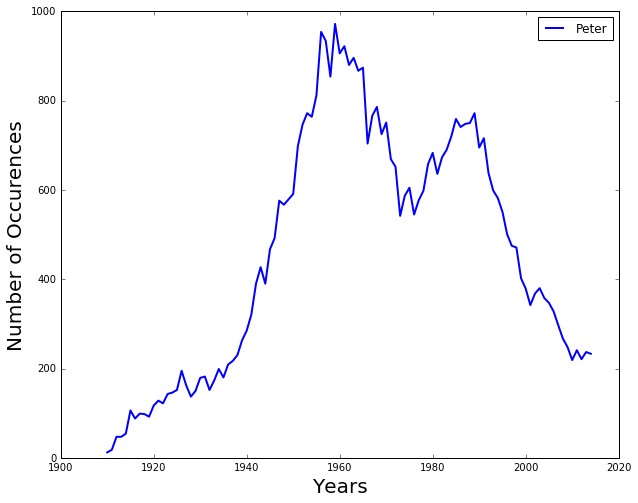

In [8]:
# Plot the state occurrences
def plot_state_occurrences(data,name):
    ''' Plot the number of occurrences for the state data '''
    plt.figure(figsize=(10, 8))
    plt.plot(data.keys(),data.values(),linewidth=2,label=name)
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Number of Occurences',fontsize=20)
    plt.legend(loc='upper right')
    plt.show()
    
data = count_yearly_occurrences_in_state('state_baby_names/CA.TXT', 'Peter')
plot_state_occurrences(data,'Peter')    

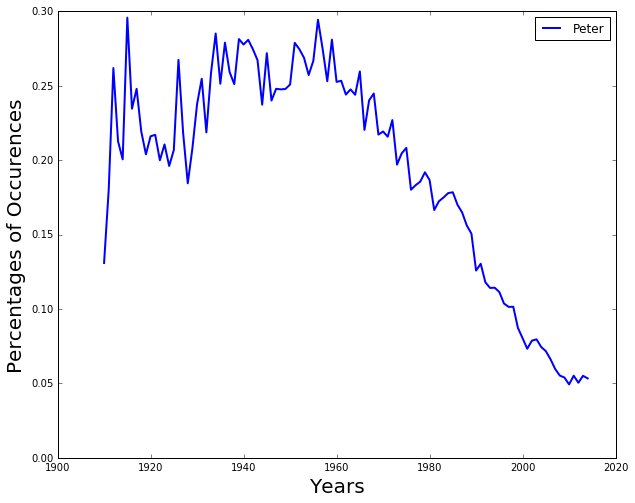

In [9]:
# Plot the state percentages
def plot_state_percentages(data, totals,name):
    ''' Plot the percentages of occurrences for the state data '''
    
    percent_occur = []
    for k in data:
         percent_occur.append(data[k]*100.0/totals[k])
            
    plt.figure(figsize=(10, 8))
    plt.plot(data.keys(),percent_occur,linewidth=2,label=name)
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Percentages of Occurences',fontsize=20)
    plt.legend(loc='upper right')
    plt.show()
    
data   = count_yearly_occurrences_in_state('state_baby_names/CA.TXT', 'Peter')
totals = count_yearly_totals_in_state('state_baby_names/CA.TXT')
plot_state_percentages(data, totals, 'Peter')    

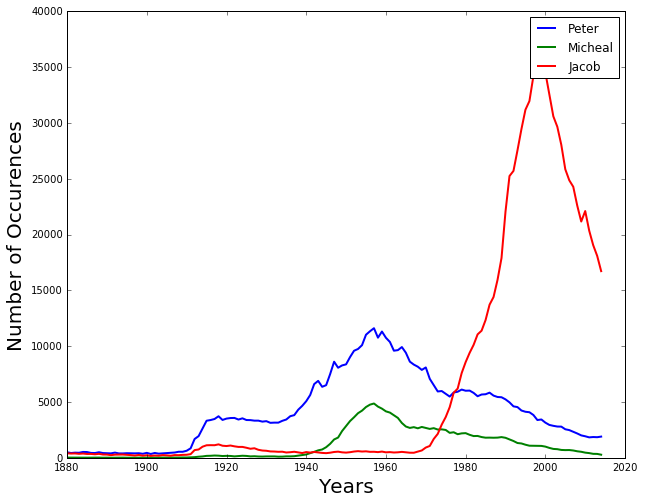

In [10]:
# Plot the number of occurrences of two/more names on the same plot.
def plot_occurrences(years,lst):
    no_of_babies = len(lst)
    
    dict_data = {}
    for key in range(len(lst)):
        dict_data[key] = count_occurrences_in_years(NATIONAL_DATA_DIR,lst[key],years)        
    
    plt.figure(figsize=(10, 8))
    for key in dict_data:        
        data = dict_data[key]
        occurrences = []
        for x in data:
            occurrences.append(x[0])
        plt.plot(years,occurrences,linewidth=2,label = lst[key])
        
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Number of Occurences',fontsize=20)
    plt.legend(loc='upper right')
    plt.show()

years = range(1880, 2015)
plot_occurrences(years,['Peter','Micheal','Jacob'])


Plot the ratio of male to female names over time.
---------------------------------------------------------

In [11]:
# First find male to female names ratio in a year.
def MtoF_Ratio_in_year(path):
    ''' Return the ratio of Male to female names for the year file specified by path '''
    try:
        year_file = open(path)
    except:
        print 'File cannot be opened:',path
        exit()
        
    Male_count=0.0
    Female_count=0.0
    for line in year_file:
        lst = line.split(',')
        if re.search(r'\b' + 'F' + r'\b',lst[1]):
            Female_count += int(lst[2])
        else:
            Male_count += int(lst[2])
    
    year_file.close()
    ratio = Male_count/Female_count
    return(ratio)
    
ratio = MtoF_Ratio_in_year(os.path.join(NATIONAL_DATA_DIR, 'yob1880.txt'))
print ratio

1.21428021936


In [12]:
def MtoF_Ratios_in_years(path,years):
    ratios = {}
    for year in years:
        filename = 'yob' + str(year) + '.txt'
        ratios[year] = MtoF_Ratio_in_year(os.path.join(path,filename))
    return ratios
    
ratios = MtoF_Ratios_in_years(NATIONAL_DATA_DIR,range(1880, 2015))
for key in ratios:
    print ratios[key]

1.21428021936
1.0956021489
1.05413073713
0.931517703724
0.887019268032
0.810191274285
0.766485626319
0.694702086559
0.676566252582
0.619983629167
0.583184943559
0.545583938064
0.574708259162
0.527542671414
0.51933860274
0.502495398707
0.502563887021
0.481456178854
0.47413919697
0.45580050038
0.501951118641
0.444837642261
0.46448195034
0.45513850664
0.465281384024
0.453723738037
0.450923288961
0.46091861655
0.461675136773
0.472309260774
0.489829786054
0.540206885505
0.770368552041
0.820724142459
0.859777715915
0.862511866357
0.852321551857
0.855940182007
0.875514729447
0.867277207792
0.888323542936
0.893315404149
0.90621182611
0.90868004609
0.907016389137
0.916709382331
0.936894670059
0.944970771515
0.960455877417
0.963177902263
0.974608287194
0.976167147488
0.978269793457
0.983543876711
0.988747546787
0.992848340563
0.996896756592
1.00229068911
1.00504315779
1.00914348875
1.01362254827
1.01657561476
1.02238281583
1.02276855411
1.02671305339
1.02951887794
1.03339265166
1.0319178583
1.03

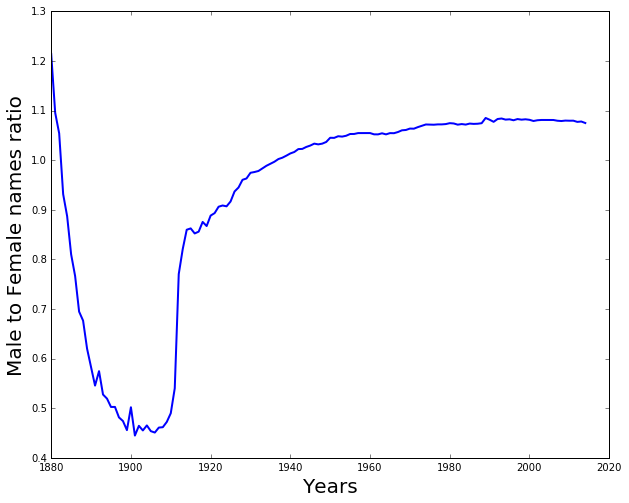

In [13]:
def plot_MtoF_ratio_over_years(ratios):
    plt.figure(figsize=(10, 8))
    plt.plot(ratios.keys(),ratios.values(),linewidth=2)
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Male to Female names ratio',fontsize=20)
    plt.show()
    
years = range(1880, 2015)
ratios = MtoF_Ratios_in_years(NATIONAL_DATA_DIR,range(1880, 2015))
plot_MtoF_ratio_over_years(ratios)   

Create a histogram for a particular year or for particular name based on number of occurrences.
--------------------------------------------------------------------------------------------------------------

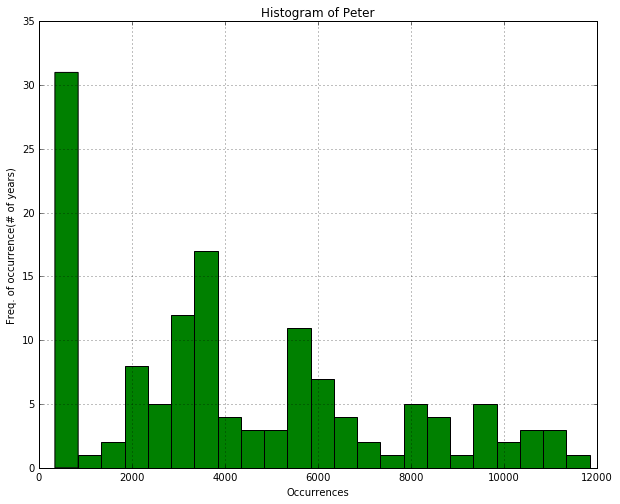

In [14]:
# Plot histogram for a particular name based on number of occurrences.
def hist_of_name(data, years,name):
    ''' Plot the number of occurrences in the given range of years '''
    occurrences = []
    for x in data:
        occurrences.append(x[0])
    
    plt.figure(figsize=(10, 8))
    #numBins = 20
    #plt.hist(occurrences,numBins,color='green',normed=False)
    binwidth = 500
    plt.hist(occurrences,bins=range(min(occurrences),max(occurrences)+binwidth,binwidth),color='green')
    plt.title("Histogram of " + name)
    plt.xlabel("Occurrences")
    plt.ylabel("Freq. of occurrence(# of years)")
    plt.grid(True)
    plt.show()
         
years = range(1880, 2015)
data  = count_occurrences_in_years(NATIONAL_DATA_DIR,'Peter',years)
hist_of_name(data, years,'Peter')        

Plot the number of unisex names (that is names are used for both genders).
--------------------------------------------------------------------------------------

In [26]:
# Count the number of unisex names in a year.
'''def no_of_unisex_names_in_year(path):
    try:
        year_file = open(path)
    except:
        print 'File cannot be opened:',path
        exit()
        
    unisex_count = 0
    Female = []
    Male = []
    for line in year_file:
        lst = line.split(',')
        if re.search(r'\b' + 'F' + r'\b',lst[1]):
            Female.append(lst[0])
        else:
            Male.append(lst[0])
    
    year_file.close()
             
    for female_name in Female:
        for male_name in Male:
            if female_name == male_name:
                unisex_count += 1;
                break;
    
    return unisex_count
    
count = no_of_unisex_names_in_year(os.path.join(NATIONAL_DATA_DIR, 'yob1880.txt'))
print count
'''

111


In [39]:
# Count the number of unisex names in a year.
def no_of_unisex_names_in_year(path):
    try:
        year_file = open(path)
    except:
        print 'File cannot be opened:',path
        exit()
        
    unisex_count = 0
    Female = {}
#    Male = {}
    for line in year_file:
        lst = line.split(',')
        if re.search(r'\b' + 'F' + r'\b',lst[1]):
            Female[lst[0]]=lst[2]
#            if lst[0] in Male:
#                unisex_count += 1
        else:
#            Male[lst[0]]=lst[2]
            if lst[0] in Female:
                unisex_count += 1
    
    year_file.close()
                
    return unisex_count
    
count = no_of_unisex_names_in_year(os.path.join(NATIONAL_DATA_DIR, 'yob1880.txt'))
print count

111


In [40]:
def no_of_unisex_names_in_years(path,years):
    unisex = {}
    for year in years:
        filename = 'yob' + str(year) + '.txt'
        unisex[year] = no_of_unisex_names_in_year(os.path.join(path,filename))
    return unisex

unisex = no_of_unisex_names_in_years(NATIONAL_DATA_DIR,range(1880,2015))
for year in unisex:
    print unisex[year]


111
105
115
122
139
155
167
158
197
200
220
206
235
209
236
250
252
265
277
265
336
252
297
293
309
324
326
356
378
390
455
473
625
704
804
946
1004
1035
1095
1066
1123
1129
1098
1104
1137
1128
1124
1137
1109
1107
1077
990
1040
995
989
951
988
981
975
977
978
1001
1039
1026
991
945
1020
1065
1051
1029
1029
1034
1070
1083
1102
1118
1123
1183
1139
1170
1172
1174
1225
1181
1186
1118
1126
1157
1196
1277
1375
1459
1402
1409
1506
1565
1550
1629
1608
1693
1727
1727
1774
1736
1761
1836
1861
1928
1936
2152
2039
2029
2064
2205
2153
2117
2119
2087
2181
2209
2255
2289
2284
2296
2545
2393
2457
2531
2557
2459
2438
2451
2448
2429
2465


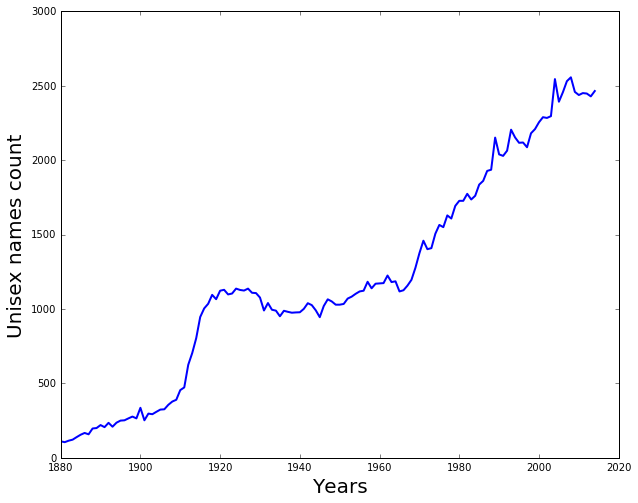

In [41]:
def plot_no_of_unisex_names_in_years(unisex):
    plt.figure(figsize=(10, 8))
    plt.plot(unisex.keys(),unisex.values(),linewidth=2)
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Unisex names count',fontsize=20)
    plt.show()
    
years = range(1880, 2015)
unisex = no_of_unisex_names_in_years(NATIONAL_DATA_DIR,range(1880, 2015))
plot_no_of_unisex_names_in_years(unisex)   